### Import libraries and read data

In [51]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

#input_data_ordered_raw =  pd.read_csv('rnap_scanned_over_ecoli_genome200k.csv')
input_data_ordered_raw = pd.read_csv('GFPdata.tsv',sep='\t')
#sequences = input_data_ordered_raw['seq'].tolist()

In [52]:
input_data_ordered_raw.head()

,AAsequence,HammingDistance,aaMutations,medianBrightness,std
0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,NaN,3.719212,0.106992
1,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1,SA108D,1.301030,NaN
2,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,5,SA108D:SN144D:SI186V:SM231T:SL234P,1.301031,NaN
3,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,4,SA108D:SY141N:SH146L:SE220G,1.301189,NaN
4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1,SA108G,3.708478,0.020613


In [53]:
sequences = input_data_ordered_raw['AAsequence']
val = input_data_ordered_raw['medianBrightness']

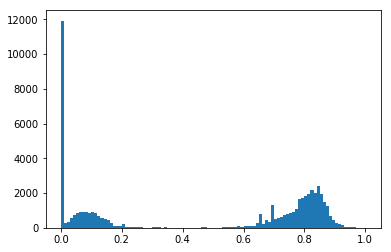

In [54]:
val_norm = (val-min(val))/(max(val)-min(val))
plt.hist(val_norm,bins=100)
plt.show()

In [55]:
len(sequences)

54025

In [56]:
np.random.seed(0)

In [57]:
T = 300
t_max = 15
t_bg = 0.01

size_of_data = 10000
#size_of_data = len(sequences)

#input_data_ordered_raw_copy = input_data_ordered_raw[0:size_of_data].copy()
input_data_ordered_raw_copy = input_data_ordered_raw.copy()

#temp = np.exp(-(np.array(input_data_ordered_raw['val'][0:size_of_data]))/T)/(1+np.exp(-(np.array(input_data_ordered_raw['val'][0:size_of_data]))/T))
#plt.hist(t_max*temp+t_bg,bins=100)
#plt.show()
#np.array(input_data_ordered_raw['val'][0:100000])


### Add transcription column to dataframe

In [58]:
#input_data_ordered_raw_copy['t'] = t_max*temp+t_bg

In [59]:
input_data_ordered_raw_copy.head()

,AAsequence,HammingDistance,aaMutations,medianBrightness,std
0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,NaN,3.719212,0.106992
1,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1,SA108D,1.301030,NaN
2,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,5,SA108D:SN144D:SI186V:SM231T:SL234P,1.301031,NaN
3,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,4,SA108D:SY141N:SH146L:SE220G,1.301189,NaN
4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1,SA108G,3.708478,0.020613


### Draw read counts according to poission distribution and add to dataframe

In [60]:
input_data_ordered_raw_copy.head(10)

,AAsequence,HammingDistance,aaMutations,medianBrightness,std
0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,NaN,3.719212,0.106992
1,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1,SA108D,1.301030,NaN
2,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,5,SA108D:SN144D:SI186V:SM231T:SL234P,1.301031,NaN
3,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,4,SA108D:SY141N:SH146L:SE220G,1.301189,NaN
4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1,SA108G,3.708478,0.020613
5,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,4,SA108G:SK138M:SR166C:SL234P,3.582764,NaN
6,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,5,SA108G:SK154E:SF163S:SL192Q:SL193P,1.499573,NaN
7,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,2,SA108G:SK156R,3.659013,NaN
8,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,5,SA108G:SK156R:SI159V:SI186V:ST223S,3.573855,NaN
9,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,5,SA108P:SK111R:SG172S:SL176P:SS200G,1.301031,NaN


## Split the data into test and train

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
#x_train, x_test, y_train, y_test = train_test_split(input_data_ordered_raw_copy['seq'],input_data_ordered_raw_copy['t_norm'],test_size=0.2,random_state=4)
#x_train, x_test, y_train, y_test = train_test_split(input_data_ordered_raw_copy['seq'],input_data_ordered_raw_copy['C'],test_size=0.2)
#x_train, x_test, y_train, y_test = train_test_split(input_data_ordered_raw_copy['seq'],input_data_ordered_raw_copy['val_norm'],test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(sequences,val_norm,test_size=0.2)



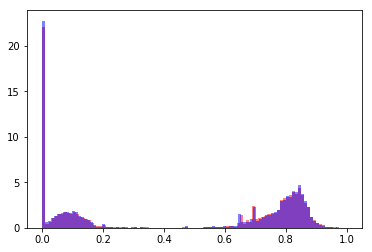

In [63]:
plt.hist(y_train,bins=100,color='r',density=True,alpha=0.5)
plt.hist(y_test,bins=100,color='b',density=True,alpha=0.5)
plt.show()

## One-hot encode the data ... this takes a few minutes

In [64]:
temp_x_train = []
temp_x_test = []

for reshape_index in range(len(x_train)):
    temp_x_train.append(list(np.array(x_train)[reshape_index]))

for reshape_test_index in range(len(x_test)):
    temp_x_test.append(list(np.array(x_test)[reshape_test_index]))
    
x_train = temp_x_train
x_test = temp_x_test

x_train = np.array(x_train)
x_test = np.array(x_test)

In [65]:
x_train[0]

array(['K', 'G', 'E', 'E', 'L', 'F', 'T', 'G', 'V', 'V', 'P', 'I', 'L',
       'V', 'E', 'L', 'D', 'G', 'D', 'V', 'N', 'G', 'H', 'K', 'F', 'S',
       'V', 'S', 'G', 'E', 'G', 'E', 'G', 'D', 'A', 'T', 'Y', 'G', 'K',
       'L', 'T', 'L', 'E', 'F', 'I', 'C', 'T', 'T', 'G', 'K', 'L', 'P',
       'V', 'P', 'W', 'P', 'A', 'L', 'V', 'T', 'T', 'L', 'S', 'Y', 'G',
       'V', 'Q', 'C', 'F', 'S', 'R', 'F', 'P', 'D', 'H', 'M', 'K', 'Q',
       'H', 'D', 'F', 'F', 'K', 'S', 'A', 'M', 'P', 'E', 'G', 'Y', 'V',
       'Q', 'E', 'R', 'T', 'I', 'F', 'F', 'K', 'D', 'D', 'G', 'N', 'Y',
       'K', 'T', 'R', 'A', 'E', 'V', 'K', 'F', 'E', 'G', 'D', 'T', 'N',
       'R', 'I', 'E', 'L', 'K', 'G', 'I', 'D', 'F', 'K', 'E', 'D', 'G',
       'N', 'I', 'L', 'G', 'H', 'K', 'L', 'E', 'Y', 'N', 'Y', 'N', 'S',
       'H', 'N', 'V', 'Y', 'I', 'M', 'A', 'D', 'K', 'Q', 'K', 'N', 'G',
       'I', 'K', 'V', 'N', 'F', 'K', 'I', 'R', 'H', 'N', 'V', 'E', 'D',
       'G', 'S', 'V', 'Q', 'L', 'A', 'D', 'H', 'Y', 'Q', 'Q', 'N

In [66]:
base_dict = {"K":0, "R":1, "H":2, "E":3, "D":4, "N":5, "Q":6, "T":7, "S":8, "C":9, "G":10, "A":11, "V":12, "L":13, "I":14, "M":15, "P":16, "Y":17, "F":18, "W":19, "*":20}   

In [67]:
test_size = len(y_test)

In [68]:
x_train_tensor = np.zeros(list(x_train.shape) + [21])    # shape: (batch_size, 4)
x_test_tensor = np.zeros(list(x_test.shape) + [21])    # shape: (batch_size, 4)
base_dict = {"K":0, "R":1, "H":2, "E":3, "D":4, "N":5, "Q":6, "T":7, "S":8, "C":9, "G":10, "A":11, "V":12, "L":13, "I":14, "M":15, "P":16, "Y":17, "F":18, "W":19, "*":20}   

num_sample = len(x_train_tensor)
seq_length = len(x_train[0])
test_size = len(x_test)

#naive one-hot encoding
for row in range(num_sample):
    for col in range(seq_length):
        x_train_tensor[row,col,base_dict[x_train[row,col]]] = 1
        if(row<test_size):
            x_test_tensor[row,col,base_dict[x_test[row,col]]] = 1

In [69]:
print('Training set shape: {}'.format(x_train_tensor.shape))
print('Training set label shape: {}'.format(y_train.shape))

print('Test set shape: {}'.format(x_test_tensor.shape))
print('Test set label shape: {}'.format(y_test.shape))

Training set shape: (43220, 233, 21)
Training set label shape: (43220,)
Test set shape: (10805, 233, 21)
Test set label shape: (10805,)


In [70]:
np.shape(x_train_tensor[0])

(233, 21)

In [71]:
y_train.shape

(43220,)

In [72]:
y_train = np.array(y_train).reshape(y_train.shape[0],1)

## Custom error metric

In [73]:
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

## Custom Loss

In [74]:
import keras.backend as K
import tensorflow as tf

K.clear_session()

def kullback_leibler_divergence_ammar(y_true, y_pred):
    tf.print(y_true,'tui')
    y_true = K.clip(y_true, K.epsilon(), 1)
    y_pred = K.clip(y_pred, K.epsilon(), 1)
    return K.sum(y_true * K.log(y_true / y_pred), axis=-1)

In [75]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout 
from keras import regularizers
from keras.optimizers import SGD, Adam, RMSprop
from keras.constraints import maxnorm, nonneg


#output_dim = nb_classes = 15 
#input_dim = seq_length
model = Sequential() 
model.add(Flatten())
#model.add(Dense(100, activation='relu',input_shape=(41,4)))
#model.add(Dropout(0.25))
#model.add(Dense(41, activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(4, activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(20, activation='linear'))
model.add(Dense(1, activation='linear'))
#model.add(Dense(20, activation='tanh'))
model.add(Dense(100, activation='sigmoid',W_constraint=nonneg()))
#model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear',W_constraint=nonneg()))
#model.add(Dense(1, activation='tanh'))

#batch_size = 10000 
#nb_epoch = 20

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="sigmoid", kernel_constraint=<keras.con...)`
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_constraint=<keras.con...)`


In [76]:
#model.compile(loss='mean_absolute_error',optimizer=Adam(lr=0.00001), metrics=['accuracy'])
#model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.0001), metrics=['mean_absolute_error'])
#model.compile(loss=kullback_leibler_divergence_ammar,optimizer=Adam(lr=0.0001), metrics=['mean_absolute_error'])
model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.0005), metrics=['mean_absolute_error'])

In [77]:
#history = model.fit(x_train_flat, y_train, validation_split=0.2, epochs=25)  # starts training
history = model.fit(x_train_tensor, y_train, validation_split=0.2, epochs=100)  # starts training

Train on 34576 samples, validate on 8644 samples
Epoch 1/100
34576/34576 [==============================] - 2s 51us/step - loss: 0.6003 - mean_absolute_error: 0.5325 - val_loss: 0.1389 - val_mean_absolute_error: 0.3607
Epoch 2/100
34576/34576 [==============================] - 1s 38us/step - loss: 0.1378 - mean_absolute_error: 0.3610 - val_loss: 0.1352 - val_mean_absolute_error: 0.3591
Epoch 3/100
34576/34576 [==============================] - 1s 40us/step - loss: 0.1322 - mean_absolute_error: 0.3530 - val_loss: 0.1273 - val_mean_absolute_error: 0.3466
Epoch 4/100
34576/34576 [==============================] - 1s 37us/step - loss: 0.1197 - mean_absolute_error: 0.3337 - val_loss: 0.1091 - val_mean_absolute_error: 0.3120
Epoch 5/100
34576/34576 [==============================] - 1s 38us/step - loss: 0.0912 - mean_absolute_error: 0.2835 - val_loss: 0.0709 - val_mean_absolute_error: 0.2410
Epoch 6/100
34576/34576 [==============================] - 2s 44us/step - loss: 0.0523 - mean_absolut

Epoch 49/100
34576/34576 [==============================] - 1s 41us/step - loss: 0.0147 - mean_absolute_error: 0.0859 - val_loss: 0.0160 - val_mean_absolute_error: 0.0880
Epoch 50/100
34576/34576 [==============================] - 1s 41us/step - loss: 0.0144 - mean_absolute_error: 0.0847 - val_loss: 0.0163 - val_mean_absolute_error: 0.0907
Epoch 51/100
34576/34576 [==============================] - 1s 42us/step - loss: 0.0139 - mean_absolute_error: 0.0827 - val_loss: 0.0152 - val_mean_absolute_error: 0.0845
Epoch 52/100
34576/34576 [==============================] - 1s 42us/step - loss: 0.0133 - mean_absolute_error: 0.0803 - val_loss: 0.0146 - val_mean_absolute_error: 0.0817
Epoch 53/100
34576/34576 [==============================] - 1s 41us/step - loss: 0.0125 - mean_absolute_error: 0.0767 - val_loss: 0.0144 - val_mean_absolute_error: 0.0803
Epoch 54/100
34576/34576 [==============================] - 1s 41us/step - loss: 0.0115 - mean_absolute_error: 0.0726 - val_loss: 0.0151 - val_me

Epoch 97/100
34576/34576 [==============================] - 1s 39us/step - loss: 0.0049 - mean_absolute_error: 0.0470 - val_loss: 0.0074 - val_mean_absolute_error: 0.0517
Epoch 98/100
34576/34576 [==============================] - 1s 39us/step - loss: 0.0048 - mean_absolute_error: 0.0465 - val_loss: 0.0083 - val_mean_absolute_error: 0.0536
Epoch 99/100
34576/34576 [==============================] - 2s 57us/step - loss: 0.0048 - mean_absolute_error: 0.0466 - val_loss: 0.0086 - val_mean_absolute_error: 0.0544
Epoch 100/100
34576/34576 [==============================] - 2s 58us/step - loss: 0.0048 - mean_absolute_error: 0.0465 - val_loss: 0.0074 - val_mean_absolute_error: 0.0518


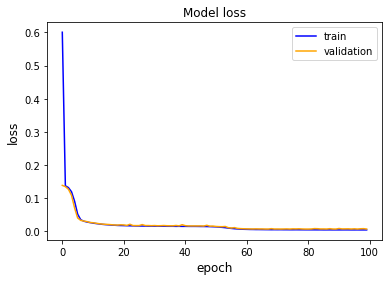

In [78]:
plt.figure()
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='orange')
plt.title('Model loss',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['train', 'validation'])
#plt.savefig('Write_up/model_loss.png')
plt.show()

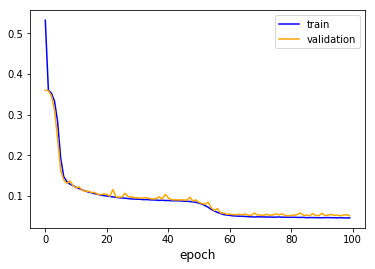

In [79]:
plt.figure()
plt.plot(history.history['mean_absolute_error'],color='blue')
plt.plot(history.history['val_mean_absolute_error'],color='orange')
#plt.title('Model loss',fontsize=12)
#plt.ylabel('loss',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['train', 'validation'])
#plt.savefig('Write_up/model_loss.png')
plt.show()

In [80]:
#model_prediction = model.predict(x_test_flat)
model_prediction = model.predict(x_test_tensor)

In [81]:
model_prediction_train = model.predict(x_train_tensor)

In [82]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4893)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4894      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 5,195
Trainable params: 5,195
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.layers
get_1st_layer_output = K.function([model.layers[0].input],[model.layers[1].output])
layer_output = get_1st_layer_output([x_test_tensor])
layer_output_train = get_1st_layer_output([x_train_tensor])

In [84]:
layer_output = np.array(layer_output)
layer_output = layer_output.reshape(y_test.shape[0],1)
np.shape(layer_output)

(10805, 1)

In [85]:
layer_output_train = np.array(layer_output_train)
layer_output_train = layer_output_train.reshape(y_train.shape[0],1)
np.shape(layer_output_train)

(43220, 1)

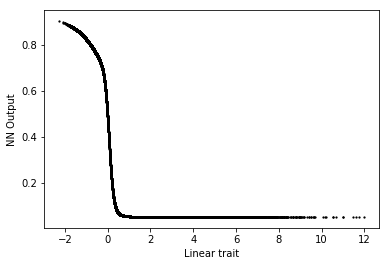

In [86]:
plt.scatter(-layer_output_train,model_prediction_train,alpha=1.0,s=1.5,color='black')
plt.xlabel('Linear trait')
plt.ylabel('NN Output')
#plt.plot([0,1],color='black',linewidth=3,alpha=0.75)
plt.show()

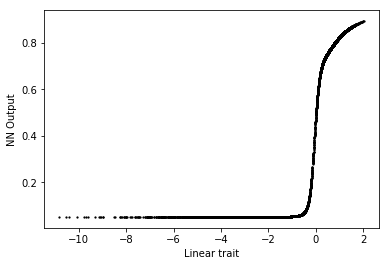

In [87]:
plt.scatter(layer_output,model_prediction,alpha=1.0,s=1.5,color='black')
plt.xlabel('Linear trait')
plt.ylabel('NN Output')
#plt.plot([0,1],color='black',linewidth=3,alpha=0.75)
plt.show()

In [88]:
y_test = np.array(y_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

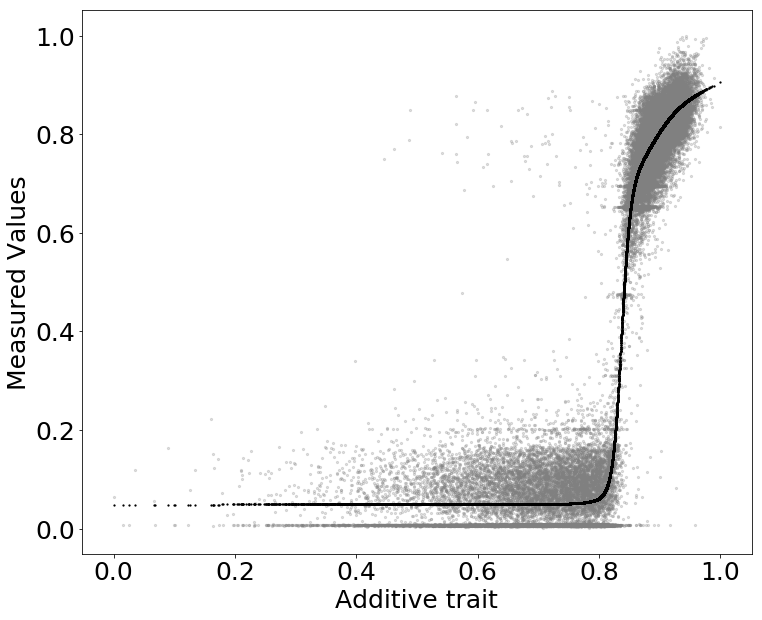

In [96]:
plt.figure
figure_size = [12,10]
plt.figure(figsize=figure_size)
#plt.title('GFP data: Amino-acid sequences vs. fluorescence. (Monotonic Fit) ', fontsize=14)

#plt.scatter(layer_output,y_test,alpha=0.25,s=1.5,color='gray', label='Fluorescence Labels vs. additive trait')
#plt.scatter(layer_output,model_prediction,alpha=1.0,s=1.5,color='black', label='NN output vs. additive trait')
layer_output_train_scaled = (layer_output_train-min(layer_output_train))/(max(layer_output_train)-min(layer_output_train))

plt.scatter(layer_output_train_scaled,y_train,alpha=0.25,s=5,color='gray', label='Fluorescence Labels vs. additive trait')
plt.scatter(layer_output_train_scaled,model_prediction_train,alpha=1.0,s=1.5,color='black', label='NN output vs. additive trait')
plt.xlabel('Additive trait',fontsize=25)
plt.ylabel('Measured Values',fontsize=25)
plt.tick_params(labelsize=25)
#plt.legend(fontsize=20)
plt.savefig('global_epistasis_100_sigmoid_hidden_neurons_monotonic_scaled_for_talk.png')
plt.show()

In [41]:
#np.savetxt('hidden_layer_out.txt',layer_output)
#np.savetxt('test_labels.txt',y_test)
#np.savetxt('NN_out.txt',model_prediction)

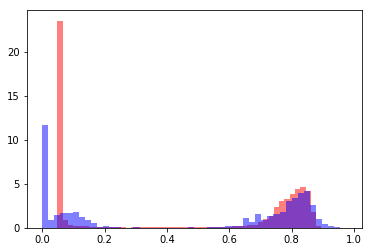

In [97]:
plt.hist(model_prediction,color='r',alpha=0.5,density=True,bins=50)
plt.hist(y_test,color='b',alpha=0.5,density=True,bins=50)
#plt.hist(model_prediction,bins=100,color='b',alpha=0.5)
plt.show()

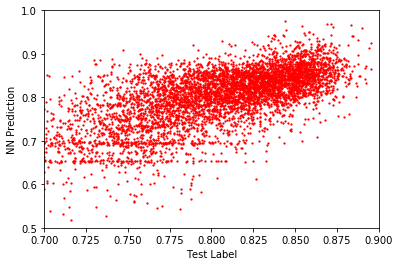

In [49]:
#plt.scatter(y_test,model_prediction,alpha=0.5)
plt.scatter(model_prediction,y_test,alpha=1.0,s=1.5,color='red')
plt.xlabel('Test Label')
plt.ylabel('NN Prediction')
#plt.plot([0,1],color='black',linewidth=3,alpha=0.75)
plt.xlim([0.7,0.9])
plt.ylim([0.5,1.0])
plt.show()

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4893)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4894      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 4,955
Trainable params: 4,955
Non-trainable params: 0
_________________________________________________________________


In [99]:
from keras.models import load_model

#model.save('NN_GB1.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('ann_delta_g_regression_40k_trian.h5')
#model = load_model('train_90k_test_5k_10_filters_1Convlayer.h5')

In [91]:
np.shape(model.layers[1].get_weights()[0].reshape(233,21))
#np.savetxt("NN_dense_layer_weights.csv", model.layers[1].get_weights()[0].reshape(21,233), delimiter=",")

In [104]:
for key in list(base_dict.keys()):
    print('val_'+key)

val_K
val_R
val_H
val_E
val_D
val_N
val_Q
val_T
val_S
val_C
val_G
val_A
val_V
val_L
val_I
val_M
val_P
val_Y
val_F
val_W
val_*


In [ ]:
model_prediction

In [ ]:
predicted_expression = np.exp((-(model_prediction))/T)/(1+np.exp((-(model_prediction))/T))


In [ ]:
predicted_counts = np.random.poisson(7*predicted_expression)
predicted_counts_normed = (predicted_counts-min(predicted_counts))/(max(predicted_counts)-min(predicted_counts))

In [ ]:
plt.hist(predicted_counts,bins=40,color='blue',alpha=0.5,density=True)
plt.hist(C[0:7677],bins=40,color='red',alpha=0.4,density=True)
plt.show()

In [ ]:
np.sum(C[0:7677])

In [ ]:
np.sum(predicted_counts)

In [ ]:
#np.shape(model.layers[1].get_weights()[0])
weights = model.layers[1].get_weights()[0]

In [ ]:
weights = weights.reshape(4,20)

In [ ]:

import seaborn as sns

fig_size = (20, 3)
fig, ax = plt.subplots(figsize=fig_size)
sns.heatmap(weights.T,cmap='RdBu_r')
plt.show()


In [ ]:
import sys
sys.path.insert(0,'/Users/tareen/Desktop/Desktop_Tests/logomaker3')
import logomaker

In [ ]:
base_dict.keys()

In [ ]:
#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)
#learned_filter = pd.DataFrame(weights,columns = ['A','C','G','T'])
learned_filter = pd.DataFrame(weights,columns = ['K', 'R', 'H', 'E', 'D', 'N', 'Q', 'T', 'S', 'C', 'G', 'A', 'V', 'L', 'I', 'M', 'P', 'Y', 'F', 'W'])


import warnings
warnings.filterwarnings("ignore")

baseline_param_dict = {
                          'baseline_width':1.0,
                      }

logo = logomaker.make_logo(
                            #dataframe=learned_filter,
                            dataframe=learned_filter.sub(learned_filter.mean(axis=1), axis=0),
                            #matrix_type='information',
                            remove_flattened_characters=False,
                            ytick_format='%0.1f',
                            draw_now=True,
                            figsize=[12,3],
                            baseline_param_dict = baseline_param_dict,
                            #ylim=[0,0.04]
                    )
print(logo)
plt.xlabel('Position',fontsize=12)
plt.title('NN weights visualized as sequence logo',fontsize=12)
#plt.ylabel('Information (bits)',fontsize=12)
plt.tight_layout()
#plt.savefig('convolution_visualization2.png')
plt.show()


In [ ]:
test_temp = learned_filter-learned_filter.T.values.mean(axis=1)

In [ ]:
learned_filter.values.mean(axis=1)[0]

In [ ]:
learned_filter.loc[0,]

In [ ]:
learned_filter.sub(learned_filter.mean(axis=1), axis=0)

In [ ]:
0.113424-0.1013713

In [ ]:
type(model_prediction)

In [ ]:
model_prediction.shape

In [91]:
import os
os.getcwd()

'/Users/tareen/Desktop/Desktop_Tests/MPathic3/mpathic/data/rnap_convnet/ANN_Logisitc_Regression'

In [ ]:
#ge =  pd.read_csv('y_gb1.csv')

In [ ]:
ge.head()

In [ ]:
plt.scatter(ge['y'],ge['z_10'],alpha=0.5,s=1)
plt.scatter(ge['y'],ge['z_20'],alpha=0.5,s=1)
#plt.scatter(ge['y'],ge['z_20_relu'],alpha=0.5)
plt.scatter(ge['y'],ge['z_41'],alpha=0.5,s=1)
plt.xlabel('Linear Prediction')
plt.ylabel('NN Prediction')
plt.show()

In [ ]:
y_test.shape

In [ ]:
#np.savetxt("linear_model_jellybean_gb1.csv", model_prediction, delimiter=",")

In [ ]:
#np.savetxt("full_model_jellybean_gb1.csv", model_prediction, delimiter=",")

In [ ]:
#np.savetxt("true_y_full.csv", y_test, delimiter=",")

In [ ]:
#np.savetxt("z_gb1_full.csv", model_prediction, delimiter=",")

In [92]:
model

In [97]:
np.shape(model.layers[1].get_weights()[0])

(80, 1)